In [128]:
import json
import pandas as pd
import os

In [129]:
%matplotlib inline

In [130]:
os.listdir()

['.ipynb_checkpoints',
 'pair_programming_data_parsing.ipynb',
 'pair_programming_data_parsing_solution.ipynb',
 'sugar_usage_america-Mine.ipynb',
 'sugar_usage_america.ipynb',
 'sugar_usage_table50.csv']

In [131]:
df = pd.read_csv('sugar_usage_table50.csv')
df.ix[3,'HFCS']
#why does this round up within the table itself?
df.iloc[2:17,4]
#df.iloc[[2:17,4]] gives an error, why? does iloc just not have the capability?


2     10.3
3     10.5
4     10.7
5     11.2
6     12.0
7     13.1
8     13.8
9     14.0
10    13.9
11    13.8
12    13.9
13    13.5
14    12.9
15    12.9
16    12.7
Name: Corn-Glucose syrup, dtype: float64

In [132]:
df.columns
#df.columns.str.strip() would remove whitespace from either side of the name e.g 
#'    Calender Year' becomes 'Calender Year'

Index(['Calendar year', 'U.S. population 3/', 'Refined sugar 4/', 'HFCS',
       'Corn-Glucose syrup', 'Corn-Dextrose', 'Corn-Total', 'Pure honey',
       'Edible syrups', 'Total caloric sweeteners'],
      dtype='object')

In [133]:
df.columns = df.columns.str.replace(' ', '_').str.replace('/','').str.lower().str.replace('-', '_')
#df.columns.str.replace(' ', '_', inplace = True) should work, why?
df.head()

,calendar_year,u.s._population_3,refined_sugar_4,hfcs,corn_glucose_syrup,corn_dextrose,corn_total,pure_honey,edible_syrups,total_caloric_sweeteners
0,1966,196.6,97.3,0.0,9.7,4.2,13.9,1.0,0.7,112.9
1,1967,198.7,98.5,0.0,9.9,4.3,14.2,0.9,0.5,114.2
2,1968,200.7,99.2,0.1,10.3,4.4,14.8,0.9,0.7,115.7
3,1969,201.4,101.0,0.3,10.5,4.5,15.3,1.0,0.6,117.9
4,1970,204.0,101.8,0.5,10.7,4.6,15.9,1.0,0.5,119.1


In [134]:
#indeces
#df.calender_year calls the column name as well.
#df[['HFCS']]
#converting to a datetime gives you access to more powerful tools e.g. rolling average per
#decade for every year, however we don't need those tools right now and the to_datetime method
#isn't working. We can just set it to the index and work with the basic functions.
#df.calender_year.to_datetime(format = '%Y') calling it as a method didn't work
#calling it as a function does.
df['calendar_year'] = pd.to_datetime(df['calendar_year'], format = '%Y')



In [135]:
#df.set_index('calendar_year') works without the square bracket, why?
df.set_index('calendar_year', inplace=True)

In [136]:
df.head()

,u.s._population_3,refined_sugar_4,hfcs,corn_glucose_syrup,corn_dextrose,corn_total,pure_honey,edible_syrups,total_caloric_sweeteners
calendar_year,,,,,,,,,
1966-01-01,196.6,97.3,0.0,9.7,4.2,13.9,1.0,0.7,112.9
1967-01-01,198.7,98.5,0.0,9.9,4.3,14.2,0.9,0.5,114.2
1968-01-01,200.7,99.2,0.1,10.3,4.4,14.8,0.9,0.7,115.7
1969-01-01,201.4,101.0,0.3,10.5,4.5,15.3,1.0,0.6,117.9
1970-01-01,204.0,101.8,0.5,10.7,4.6,15.9,1.0,0.5,119.1


,u.s._population_3,refined_sugar_4,hfcs,corn_glucose_syrup,corn_dextrose,corn_total,pure_honey,edible_syrups,total_caloric_sweeteners,hfcs_percent_of_total
calendar_year,,,,,,,,,,
1966-01-01,196.6,97.3,0.0,9.7,4.2,13.9,1.0,0.7,112.9,0.000000
1967-01-01,198.7,98.5,0.0,9.9,4.3,14.2,0.9,0.5,114.2,0.000000
1968-01-01,200.7,99.2,0.1,10.3,4.4,14.8,0.9,0.7,115.7,0.086430
1969-01-01,201.4,101.0,0.3,10.5,4.5,15.3,1.0,0.6,117.9,0.254453
1970-01-01,204.0,101.8,0.5,10.7,4.6,15.9,1.0,0.5,119.1,0.419815


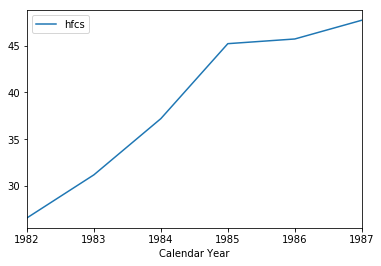

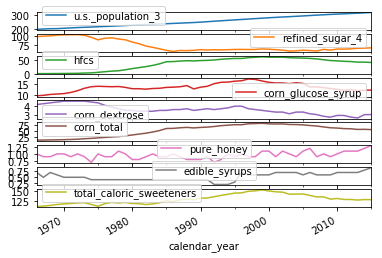

In [137]:
myplot = df['1982':'1987'].plot(y='hfcs')
#assumes x is index if no parameter passed
myplot.set_xlabel("Calendar Year")
df.plot(subplots=True)
df['hfcs'].min()
df['hfcs_percent_of_total'] = df.hfcs / df.total_caloric_sweeteners * 100.00
#above is vectorized math. for loop could be the same thing but much more inefficient,
#vectorized math within dataframes is clean good fun and makes the world go round.
df.head()

/Users/dillonschow/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dillonschow/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dillonschow/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

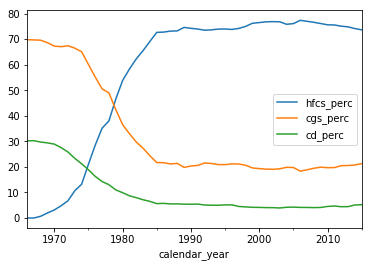

In [143]:
#Binning Similar Categories
df.iloc[0,1:8].sum()
#checked to ensure units were constant with sum of subcategories
#df.iloc[0,(1,5,6,7)].sum() == df.iloc[0,8] checks between subcategories and totals.
#corn(2-4) is already binned in 5. we'll use that first. making a new data frame to start.
df2 = df.iloc[:,2:6]
df2.head()
df2['hfcs_perc'] = df2.hfcs / df2.corn_total * 100
df2['cgs_perc'] = df2.corn_glucose_syrup / df2.corn_total * 100
df2['cd_perc'] = df2.corn_dextrose / df2.corn_total * 100
df2 = df2.iloc[:,-4:]
df2.head()
myplot2 = df2.iloc[:,-3:].plot()
myplot2

In [139]:
df3 = df.iloc[:,(1,5,6,7,8)]
df3.head()

,refined_sugar_4,corn_total,pure_honey,edible_syrups,total_caloric_sweeteners
calendar_year,,,,,
1966-01-01,97.3,13.9,1.0,0.7,112.9
1967-01-01,98.5,14.2,0.9,0.5,114.2
1968-01-01,99.2,14.8,0.9,0.7,115.7
1969-01-01,101.0,15.3,1.0,0.6,117.9
1970-01-01,101.8,15.9,1.0,0.5,119.1


In [142]:
df3['refsug_perc'] = df3.loc[:,'refined_sugar_4'] / df3.loc[:,'total_caloric_sweeteners'] * 100
df3['corn_perc'] = df3.loc[:,'corn_total'] / df3.loc[:,'total_caloric_sweeteners'] * 100
df3['honey_perc'] = df3.loc[:,'pure_honey'] / df3.loc[:,'total_caloric_sweeteners'] * 100
df3['syrups_perc'] = df3.loc[:,'edible_syrups'] / df3.loc[:,'total_caloric_sweeteners'] * 100
df3.head()

/Users/dillonschow/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/dillonschow/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/dillonschow/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,refined_sugar_4,corn_total,pure_honey,edible_syrups,total_caloric_sweeteners,refsug_perc,corn_perc,honey_perc,syrups_perc
calendar_year,,,,,,,,,
1966-01-01,97.3,13.9,1.0,0.7,112.9,86.182462,12.311780,0.885740,0.620018
1967-01-01,98.5,14.2,0.9,0.5,114.2,86.252189,12.434326,0.788091,0.437828
1968-01-01,99.2,14.8,0.9,0.7,115.7,85.738980,12.791703,0.777874,0.605013
1969-01-01,101.0,15.3,1.0,0.6,117.9,85.665818,12.977099,0.848176,0.508906
1970-01-01,101.8,15.9,1.0,0.5,119.1,85.474391,13.350126,0.839631,0.419815


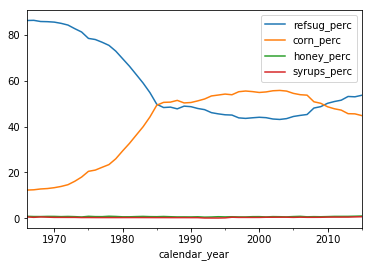

In [144]:
myoplot = df3.iloc[:,-4:].plot()

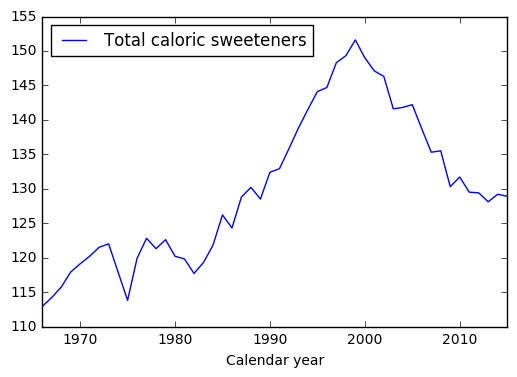

In [11]:
df.plot(x='Calendar year', y='Total caloric sweeteners')

In [12]:
df.corr()

,Calendar year,U.S. population 3/,Refined sugar 4/,HFCS,Corn-Glucose syrup,Corn-Dextrose,Corn-Total,Pure honey,Edible syrups,Total caloric sweeteners
Calendar year,1.000000,0.997763,-0.805074,0.832988,0.416765,-0.866450,0.811348,0.441821,0.493051,0.691736
U.S. population 3/,0.997763,1.000000,-0.772930,0.809498,0.390222,-0.858574,0.786961,0.467031,0.534958,0.683060
Refined sugar 4/,-0.805074,-0.772930,1.000000,-0.958900,-0.598244,0.757814,-0.948534,-0.102514,-0.095412,-0.717149
HFCS,0.832988,0.809498,-0.958900,1.000000,0.707569,-0.695033,0.997891,0.153042,0.178380,0.882794
Corn-Glucose syrup,0.416765,0.390222,-0.598244,0.707569,1.000000,-0.207145,0.750813,-0.096959,-0.174597,0.824911
Corn-Dextrose,-0.866450,-0.858574,0.757814,-0.695033,-0.207145,1.000000,-0.659685,-0.351752,-0.375505,-0.422407
Corn-Total,0.811348,0.786961,-0.948534,0.997891,0.750813,-0.659685,1.000000,0.131329,0.149181,0.900809
Pure honey,0.441821,0.467031,-0.102514,0.153042,-0.096959,-0.351752,0.131329,1.000000,0.642816,0.167282
Edible syrups,0.493051,0.534958,-0.095412,0.178380,-0.174597,-0.375505,0.149181,0.642816,1.000000,0.219183
Total caloric sweeteners,0.691736,0.683060,-0.717149,0.882794,0.824911,-0.422407,0.900809,0.167282,0.219183,1.000000


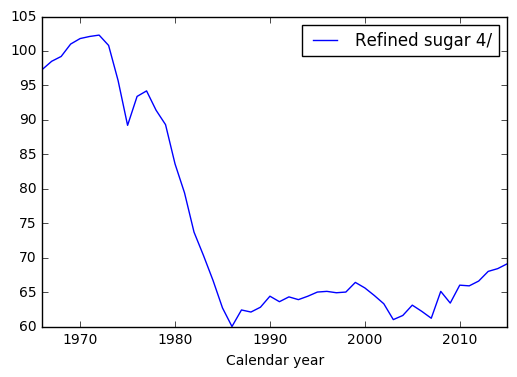

In [14]:
df.plot(x='Calendar year', y='Refined sugar 4/')